##knock out rebate 형 ELD
Knock Out Rebate형 ELD는 특정 조건이 충족될 때 원금과 함께 추가 리베이트를 지급하는 주가연계예금입니다.

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


초기 가격: 3700.65
최종 가격: 3839.50
총 수익: 105000.00
수익: 5000.00


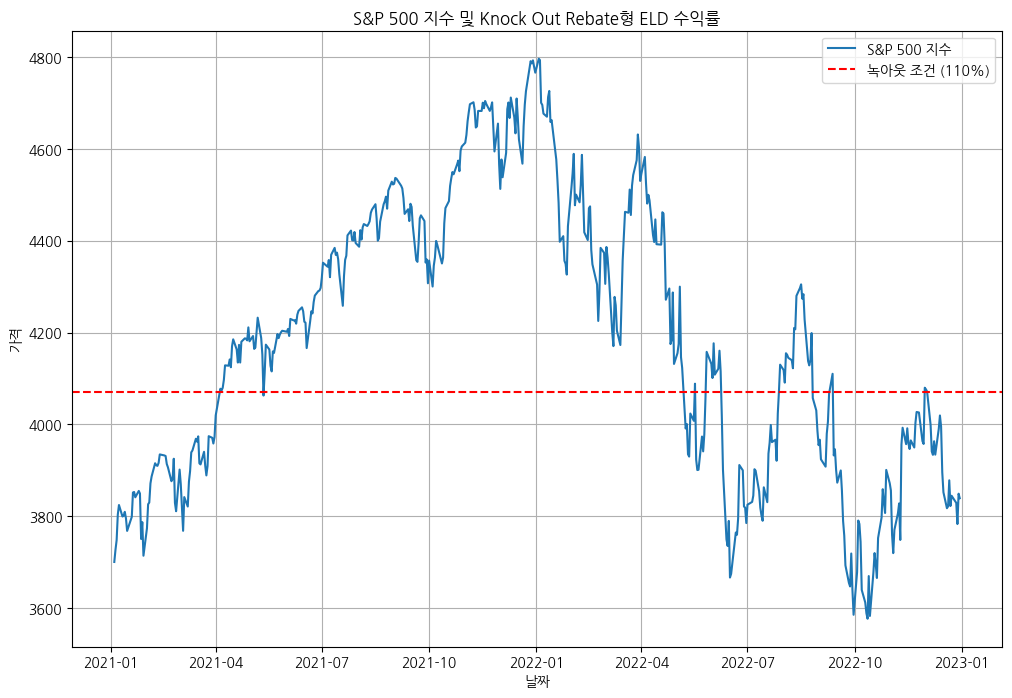

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Knock Out Rebate형 ELD의 수익률 계산 함수
def knock_out_rebate_eld(initial_price, prices, knock_out_barrier, rebate, principal):
    """
    initial_price: 기초 자산의 초기 가격
    prices: 기초 자산의 가격 배열
    knock_out_barrier: 녹아웃 조건
    rebate: 녹아웃 시 지급되는 리베이트
    principal: 원금
    """
    knock_out = False
    for price in prices:
        if price >= knock_out_barrier:
            knock_out = True
            break

    if knock_out:
        total_return = principal + rebate
    else:
        final_price = prices[-1]
        price_return = (final_price - initial_price) / initial_price
        total_return = principal + principal * price_return

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2021-01-01", end="2023-01-01")
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
knock_out_barrier = 1.1 * initial_price  # 녹아웃 조건 (110% 초기 가격)
principal = 100000  # 원금 (100,000 달러)
rebate = 0.05 * principal  # 리베이트 (5% 원금)


# Knock Out Rebate형 ELD의 수익률 계산
total_return = knock_out_rebate_eld(initial_price, prices, knock_out_barrier, rebate, principal)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"총 수익: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# ELD 수익률 시계열 계산
eld_prices = np.zeros_like(prices)
knock_out = False
for i, price in enumerate(prices):
    if price >= knock_out_barrier and not knock_out:
        eld_prices[i:] = principal + rebate
        knock_out = True
    elif not knock_out:
        eld_prices[i] = principal + principal * (price - initial_price) / initial_price

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
plt.axhline(y=knock_out_barrier, color='r', linestyle='--', label='녹아웃 조건 (110%)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 Knock Out Rebate형 ELD 수익률')
plt.legend()
plt.grid(True)
plt.show()


초기 가격: 3700.65
최종 가격: 3839.50
총 수익: 5250.00
수익: 250.00


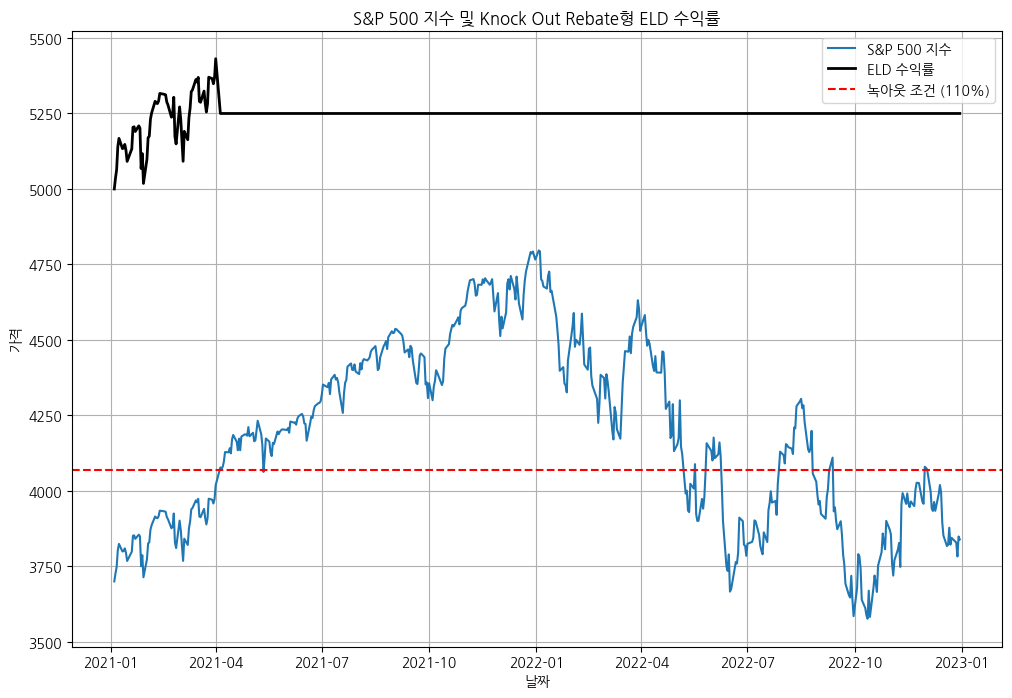

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Knock Out Rebate형 ELD의 수익률 계산 함수
def knock_out_rebate_eld(initial_price, prices, knock_out_barrier, rebate, principal):
    """
    initial_price: 기초 자산의 초기 가격
    prices: 기초 자산의 가격 배열
    knock_out_barrier: 녹아웃 조건
    rebate: 녹아웃 시 지급되는 리베이트
    principal: 원금
    """
    knock_out = False
    for price in prices:
        if price >= knock_out_barrier:
            knock_out = True
            break

    if knock_out:
        total_return = principal + rebate
    else:
        final_price = prices[-1]
        price_return = (final_price - initial_price) / initial_price
        total_return = principal + principal * price_return

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2021-01-01", end="2023-01-01")
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
knock_out_barrier = 1.1 * initial_price  # 녹아웃 조건 (110% 초기 가격)
principal = 5000  # 원금 (5,000 달러)
rebate = 0.05 * principal  # 리베이트 (5% 원금)


# Knock Out Rebate형 ELD의 수익률 계산
total_return = knock_out_rebate_eld(initial_price, prices, knock_out_barrier, rebate, principal)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"총 수익: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# ELD 수익률 시계열 계산
eld_prices = np.zeros_like(prices)
knock_out = False
for i, price in enumerate(prices):
    if price >= knock_out_barrier and not knock_out:
        eld_prices[i:] = principal + rebate
        knock_out = True
    elif not knock_out:
        eld_prices[i] = principal + principal * (price - initial_price) / initial_price

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
plt.plot(dates, eld_prices, label='ELD 수익률', linewidth=2, color='black')
plt.axhline(y=knock_out_barrier, color='r', linestyle='--', label='녹아웃 조건 (110%)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 Knock Out Rebate형 ELD 수익률')
plt.legend()
plt.grid(True)
plt.show()
